In [1]:
import eplot
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([np.random.uniform(10,1,size=1000),
                   np.random.uniform(10,5,size=1000),
                   np.random.randint(1,high=10,size=1000),
                   np.random.choice(list('ABCD'),size=1000)],
                  index=['col1','col2','col3','col4']).T

In [3]:
df.head()

,col1,col2,col3,col4
0,8.10732,7.19006,3,B
1,1.1154,7.24726,1,D
2,8.03033,7.62048,5,A
3,7.82433,5.95368,5,B
4,9.67883,8.14567,4,B


# 折线图

 默认为折线图

In [4]:
df.eplot() # == df.eplot.line() == df.eplot(kind='line')

In [5]:
df.col3.eplot()

# 柱状图

In [6]:
v = df.col4.value_counts()
v.eplot.bar()

# 直方图

In [7]:
df.col1.eplot.hist(bins=8)

# 散点图 

散点图用于DataFrame  
可通过category_col指定类别列

In [8]:
df.eplot.scatter(x='col1',y='col2')

In [9]:
df.eplot.scatter(x='col1',y='col2',category_col='col4')

In [10]:
df.eplot.scatter3d(x='col1',y='col2',z='col3')

In [11]:
df.eplot.scatter3d(x='col1',y='col2',z='col3',category_col='col4')

# 饼图

In [12]:
v = df.col4.value_counts() 

In [13]:
v.eplot.pie()

In [14]:
v.eplot.pie(inner_radius_from=30)

In [15]:
v = df.col4.value_counts()
v.eplot.pie(inner_radius_from=30,rosetype='rodius')

In [16]:
df.head(10).eplot.pie(y='col2',legend_pos='center',legend_orient='') 

# countplot

统计某列中各元素的次数

In [17]:
df.col4.eplot.countplot()

# 箱线图

In [18]:
df.eplot.box()

In [19]:
df.col1.eplot.box()

# updata

In [92]:
bar = pyecharts.charts.Bar()

In [177]:
df.values.shape

(1000, 4)

In [188]:
df.col1.values.reshape((1,-1)).shape

(1, 1000)

In [187]:
df.values.T.shape

(4, 1000)

In [226]:
import pandas
import pyecharts
import numpy as np
from pandas.core.base import PandasObject
from pandas.core.accessor import CachedAccessor
import pyecharts.options as opts

from pyecharts.render.display import HTML
from pyecharts.render.engine import RenderEngine
from pyecharts.commons import utils


def chart_render(chart):
    chart._prepare_render()
    require_config = utils.produce_require_dict(
        chart.js_dependencies, chart.js_host
    )
    return HTML(
        RenderEngine().render_chart_to_notebook(
            template_name="jupyter_notebook.html",
            charts=(chart,),
            config_items=require_config["config_items"],
            libraries=require_config["libraries"],))


def bar(data, title=None, useCols=None, **args):
    barFig = pyecharts.charts.Bar()
    barFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    if isinstance(data, pandas.Series):
        barFig.add_xaxis(data.index.tolist())
        barFig.add_yaxis(data.name, data.values.tolist())
    elif isinstance(data, pandas.DataFrame):
        useCols = useCols if useCols else data.columns
        for i in useCols:
            barFig.add_xaxis(data[i].index.tolist())
            barFig.add_yaxis(i, data[i].values.tolist())
    return chart_render(barFig)


def line(data, title=None, lineConfig=None, manyLineConfig=None, useCols=None, **args):
    lineFig = pyecharts.charts.Line()
    lineFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    if isinstance(data, pandas.Series):
        lineConfig = lineConfig if lineConfig else {}

        lineFig.add_xaxis(data.index.tolist())
        lineFig.add_yaxis(data.name, data.values.tolist(),
                          **lineConfig, **args)
    elif isinstance(data, pandas.DataFrame):
        if useCols is None:
            useCols = data.columns
        if lineConfig is None:
            manyLineConfig = {}
        for i in useCols:
            lineFig.add_xaxis(data.index.tolist())\
                .add_yaxis(i, data[i].tolist(), **manyLineConfig.get(i, {}))
    lineFig.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    return chart_render(lineFig)


def pie(data, y=None, title=None, **args):
    pieFig = pyecharts.charts.Pie()
    pieFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    if isinstance(data, pandas.Series):
        pieFig.add(data.name, list(zip(data.index.tolist(),
                                       data.values.tolist())), **args)
    elif isinstance(data, pandas.DataFrame):
        pieFig.add(y, list(zip(data.index.tolist(),
                               data[y].values.tolist())), **args)
    pieFig.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    return chart_render(pieFig)


def hist(data, title='histogram', bins=10, **args):
    histFig = pyecharts.charts.Bar()
    histFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    y, x = np.histogram(data, bins=bins)
    x = x.astype(int).astype(str)
    xlabels = [x[i-1]+'-'+x[i] for i in range(1, len(x))]
    histFig.add_xaxis(xlabels)
    histFig.add_yaxis(data.name, y.tolist(), **args)
    return chart_render(histFig)


def box(data, title=None, **args):
    boxFig = pyecharts.charts.Boxplot()
    boxFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    if isinstance(data, pandas.Series):
        boxFig.add_xaxis([data.name])
        boxFig.add_yaxis('', boxFig.prepare_data(
            data.values.reshape((1, -1)).tolist()))
    elif isinstance(data, pandas.DataFrame):
        boxFig.add_xaxis(data.columns.tolist())
        boxFig.add_yaxis('', boxFig.prepare_data(data.values.T.tolist()))
    return chart_render(boxFig)


def countplot(data, title=None, **args):
    return data.value_counts().eplot.bar(title='countplot', **args)


def scatter(data, x, y, category_col=None, title=None, category_name=None, **args):
    scatterFig = pyecharts.charts.Scatter()
    lineFig = pyecharts.charts.Line()
    scatterFig.set_global_opts(title_opts=opts.TitleOpts(title=title))
    if category_col is None:
        (scatterFig.add_xaxis(data[x].values.tolist())
         .add_yaxis('', df[y].values.tolist())
         .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
         )
    else:
        for cat, d in data.groupby(category_col):
            #scatterFig.add(cat, d[x], d[y], **args)
            (scatterFig.add_xaxis(d[x].values.tolist())
             .add_yaxis(cat, d[y].values.tolist())
             .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
             )
    return chart_render(scatterFig)


def scatter3d(data, x, y, z, category_col=None, title=None, category_name=None, **args):
    scatter3dFig = pyecharts.charts.Scatter3D(title)
    if category_col is None:
        scatter3dFig.add(category_name, data[[x, y, z]].values, **args)
    else:
        for cat, d in data.groupby(category_col):
            scatter3dFig.add(cat, d[[x, y, z]].values, **args)
    return scatter3dFig


def eplot_series(se, kind='bar', title=None, bins=10, **kwds):
    if kind == 'bar':
        return bar(se, title=title, **kwds)
    if kind == 'line':
        return line(se, title=title, **kwds)
    if kind == 'pie':
        return pie(se, title=title, **kwds)
    if kind == 'hist':
        return hist(se, title=title, bins=bins, **kwds)
    if kind == 'box':
        return box(se, title=title, **kwds)
    if kind == 'countplot':
        return countplot(se, title=title, **kwds)


def eplot_frame(df, kind='bar', x=None, y=None, z=None, category_col=None, category_name=None, title=None, **kwds):
    if kind == 'bar':
        return bar(df, title=title, **kwds)
    if kind == 'line':
        return line(df, title=title, **kwds)
    if kind == 'box':
        return box(df, title=title, **kwds)
    if kind == 'pie':
        return pie(df, y=y, title=title, **kwds)
    if kind == 'scatter':
        return scatter(df, x=x, y=y, category_col=category_col, category_name=category_name, title=title, **kwds)
    if kind == 'scatter3d':
        return scatter3d(df, x=x, y=y, z=z, category_col=category_col, category_name=category_name, title=title, **kwds)


class EchartsBasePlotMethods(PandasObject):
    def __init__(self, data):
        self._parent = data  # can be Series or DataFrame

    def __call__(self, *args, **kwargs):
        raise NotImplementedError


class EchartsSeriesPlotMethods(EchartsBasePlotMethods):
    def __call__(self, kind='line', bins=10, title=None, **kwds):
        return eplot_series(self._parent, kind=kind, title=title, bins=bins, **kwds)

    def bar(self, title='bar', **kwds):
        return self(kind='bar', title=title, **kwds)

    def line(self, title='line', **kwds):
        return self(kind='line', title=title, **kwds)

    def pie(self, title='pie', y=None, color=None, radius=None, center=None, rosetype=None, label_opts=None, **kwds):
        if color is not None:
            kwds.update({'color': color})
        if radius is not None:
            kwds.update({'radius': radius})
        if center is not None:
            kwds.update({'center': center})
        if rosetype is not None:
            kwds.update({'rosetype': rosetype})
        if label_opts is not None:
            kwds.update({'label_opts': label_opts})
        return self(kind='pie', title=title, **kwds)

    def hist(self, title='histogram', bins=10, **kwds):
        return self(kind='hist', title=title, bins=bins, **kwds)

    def box(self, title='box', **kwds):
        return self(kind='box', title=title, **kwds)

    def countplot(self, title='countplot', **kwds):
        return self(kind='countplot', title=title, **kwds)


class EchartsFramePlotMethods(EchartsBasePlotMethods):
    def __call__(self, kind='line', x=None, y=None, z=None, category_col=None, category_name=None, title=None, **kwds):
        return eplot_frame(self._parent, kind=kind, x=x, y=y, z=z, category_col=category_col, category_name=category_name, title=title, **kwds)

    def bar(self, title='bar', **kwds):
        return self(kind='bar', title=title, **kwds)

    def line(self, title='line', **kwds):
        return self(kind='line', title='title', **kwds)

    def box(self, title='box', **kwds):
        return self(kind='box', title=title, **kwds)

    def pie(self, title='pie', y=None, color=None, radius=None, center=None, rosetype=None, label_opts=None,  **kwds):
        if color is not None:
            kwds.update({'color': color})
        if radius is not None:
            kwds.update({'radius': radius})
        if center is not None:
            kwds.update({'center': center})
        if rosetype is not None:
            kwds.update({'rosetype': rosetype})
        if label_opts is not None:
            kwds.update({'label_opts': label_opts})

        return self(kind='pie', y=y, title=title, **kwds)

    def scatter(self, x, y, category_col=None, category_name=None, title='scatter'):
        return self(kind='scatter', x=x, y=y, category_col=category_col, category_name=category_name, title=title)

    def scatter3d(self, x, y, z, category_col=None, category_name=None, title='scatter3d'):
        return self(kind='scatter3d', x=x, y=y, z=z, category_col=category_col, category_name=category_name, title=title)


pandas.Series.eplot = CachedAccessor("eplot", EchartsSeriesPlotMethods)
pandas.DataFrame.eplot = CachedAccessor("eplot", EchartsFramePlotMethods)

In [227]:
import pandas as pd

In [234]:
df.dtypes

col1    object
col2    object
col3    object
col4    object
dtype: object

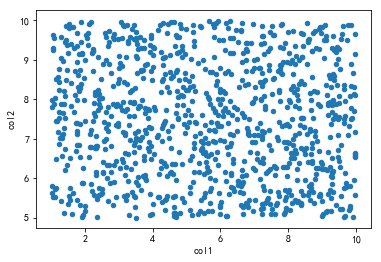

In [237]:
df.plot.scatter(x='col1',y='col2')

In [239]:
df.col1.values.tolist()

[2.496492463564544,
 1.7427920047673044,
 7.759999743445081,
 1.6762468576547835,
 9.339153727464849,
 9.59415672465516,
 9.521371760565792,
 8.66514870379082,
 5.5024019760615435,
 6.408483632959441,
 8.652687957274914,
 4.064606731967221,
 2.353698865036752,
 6.360231142541707,
 9.96088602118722,
 7.3507804623648205,
 9.517560098035418,
 9.100259089403979,
 9.288863875571826,
 6.28337767318677,
 7.575951108305246,
 1.91692209179363,
 8.937478589991553,
 3.930819735881335,
 8.481321403610618,
 7.165851056448877,
 8.88538234548415,
 9.26863145956197,
 8.70389242523395,
 9.973309934004847,
 4.3485015041410495,
 9.137405441569548,
 6.058729951504265,
 3.5651008743524395,
 6.801628046387025,
 4.953250662046376,
 4.155144362027009,
 5.914489229224037,
 7.900747377990488,
 1.1220605826542513,
 4.279797096000498,
 8.089566120895276,
 3.9377577986491854,
 1.352927763190678,
 8.531560408031858,
 3.9882579593862326,
 3.0859644609565136,
 6.371548643968998,
 2.9820059906827794,
 7.85730651341175

In [240]:
scatter3DFig = pyecharts.charts.Scatter3D()

(scatter3DFig.add('',df[['col1','col2','col3']].values.tolist())
 .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
chart_render(scatter3DFig)

In [160]:

v1 = [
    [850, 740, 900, 1070, 930, 850, 950, 980, 980, 880]
    + [1000, 980, 930, 650, 760, 810, 1000, 1000, 960, 960],
    [960, 940, 960, 940, 880, 800, 850, 880, 900]
    + [840, 830, 790, 810, 880, 880, 830, 800, 790, 760, 800],
]
v2 = [
    [890, 810, 810, 820, 800, 770, 760, 740, 750, 760]
    + [910, 920, 890, 860, 880, 720, 840, 850, 850, 780],
    [890, 840, 780, 810, 760, 810, 790, 810, 820, 850, 870]
    + [870, 810, 740, 810, 940, 950, 800, 810, 870],
]
c = Boxplot()
(c.add_xaxis(["expr1", "expr2"])
 .add_yaxis("A", c.prepare_data(v1))
 .add_yaxis("B", c.prepare_data(v2))
 .set_global_opts(title_opts=opts.TitleOpts(title="BoxPlot-基本示例"))
)
chart_render(c)

In [220]:
def line_areastyle_boundary_gap() -> Line:
    c = (
        Line()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False),)
        )
    
    return c

In [211]:
from pyecharts.charts import Line

In [191]:
from pyecharts.charts import Boxplot

In [192]:
v=df.col4.value_counts()

In [236]:
df.eplot.scatter(x='col1',y='col2')

In [202]:
boxFig.prepare_data(df.col3.values.reshape(1,-1).tolist())

[[1, 3.0, 5.0, 7.0, 9]]

In [200]:
df.col3.eplot.box().render_notebook()

In [197]:
df.eplot.box().render_notebook()

In [235]:
df = pd.DataFrame([np.random.uniform(10,1,size=1000),
                   np.random.uniform(10,5,size=1000),
                   np.random.randint(1,high=10,size=1000),
                   np.random.choice(list('ABCD'),size=1000)],
                  index=['col1','col2','col3','col4']).T
df.col1 = df.col1.astype('float')
df.col2 = df.col2.astype('float')
df.col3 = df.col3.astype('float')

In [56]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Page, Pie


def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(Faker.choose(), Faker.values())])
        .set_global_opts(title_opts=opts.TitleOpts(title="Pie-基本示例"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c